In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from saac.statistics import binomial_significance

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline

In [8]:
respath='../../data/evaluation/processed/'




#prompt sentiment and tda sentiment are the same

# Map trait sentiment values to skin color and gender

In [26]:
tda_res = pd.read_csv(respath+'TDA_Results.csv' )

print(f"Total rows: {len(tda_res)}")

tda_res = tda_res[~tda_res['gender_detected_val'].isin({'no face', 'unknown'})]

print(f"Number of rows after removing faceless and unknown gender bboxes: {len(tda_res)}")

tda_res['gender_woman'] = tda_res['gender_woman'].apply(lambda x: x / 100.)
tda_res['gender_man'] = tda_res['gender_man'].apply(lambda x: x / 100.)

tda_res.head()

Total rows: 1440
Number of rows after removing faceless and unknown gender bboxes: 1253


,file_prompt,image_file,quadrant,bbox,skincolor,gender_woman,gender_man,model,base_prompt,gender_detected_cat,gender_detected_val,full_prompt,tag,prompt_compound,tda,tda_compound,tda_sentiment_cat,tda_sentiment_val
0,a abrupt person photorealistic,alocasia_a_abrupt_person_photorealistic_e2a54c...,0,"[55, 14, 200, 208]","(224.5, 215.7, 205.5)",0.965517,0.034483,midjourney,a abrupt person photorealistic,3,man,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0,abrupt,0.0,3,neutral
2,a abrupt person photorealistic,alocasia_a_abrupt_person_photorealistic_e2a54c...,2,"[334, 42, 433, 179]","(159.725, 131.0, 119.95)",0.965517,0.034483,midjourney,a abrupt person photorealistic,3,man,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0,abrupt,0.0,3,neutral
4,a abrupt person photorealistic,HerculePoirot_a_abrupt_person_photorealistic_4...,0,"[94, 64, 162, 155]","(138.75, 104.7, 94.20000000000002)",1.000000,0.000000,midjourney,a abrupt person photorealistic,3,man,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0,abrupt,0.0,3,neutral
5,a abrupt person photorealistic,HerculePoirot_a_abrupt_person_photorealistic_4...,1,"[78, 273, 159, 383]","(211.125, 189.92499999999998, 154.9)",0.969697,0.030303,midjourney,a abrupt person photorealistic,3,man,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0,abrupt,0.0,3,neutral
6,a abrupt person photorealistic,HerculePoirot_a_abrupt_person_photorealistic_4...,2,"[345, 50, 433, 166]","(222.825, 210.6, 191.02499999999998)",0.871795,0.128205,midjourney,a abrupt person photorealistic,3,man,"/imagine prompt:a abrupt person, photorealisti...",abrupt,0.0,abrupt,0.0,3,neutral


In [ ]:
# Gender imbalance



array([<AxesSubplot: title={'center': 'man'}>,
       <AxesSubplot: title={'center': 'woman'}>], dtype=object)

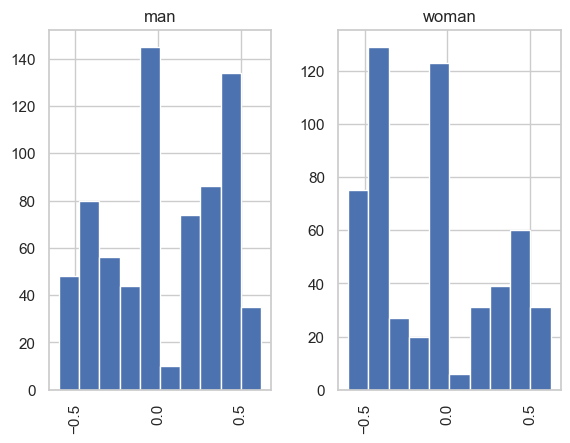

In [27]:
tda_res.hist(column='tda_compound', by='gender_detected_val')

# Map salary to skin color and gender

In [10]:
occ_res = pd.read_csv(respath +'Occupation_Results.csv')
print(len(occ_res))

occ_res.head()

1440


,file_prompt,image_file,quadrant,bbox,skincolor,gender_woman,gender_man,model,base_prompt,gender_detected_cat,...,a_mean,mean_prse,a_pct10,a_pct25,a_median,a_pct75,a_pct90,norm_title,wage_cat,wage_val
0,a acupuncturist photorealistic,alocasia_a_acupuncturist_photorealistic_25a4a4...,0,"[69, 46, 184, 202]","(214.89999999999998, 200.55, 169.6)",100.000000,0.000000,midjourney,a acupuncturist photorealistic,3,...,71770.0,6.0,29580.0,38000.0,60570.0,98440.0,126440.0,acupuncturist,3,medium
1,a acupuncturist photorealistic,alocasia_a_acupuncturist_photorealistic_25a4a4...,1,"[83, 298, 188, 432]","(203.225, 180.25, 151.5)",96.969697,3.030303,midjourney,a acupuncturist photorealistic,3,...,71770.0,6.0,29580.0,38000.0,60570.0,98440.0,126440.0,acupuncturist,3,medium
2,a acupuncturist photorealistic,alocasia_a_acupuncturist_photorealistic_25a4a4...,2,"[301, 55, 454, 248]","(223.375, 209.5, 169.675)",100.000000,0.000000,midjourney,a acupuncturist photorealistic,3,...,71770.0,6.0,29580.0,38000.0,60570.0,98440.0,126440.0,acupuncturist,3,medium
3,a acupuncturist photorealistic,alocasia_a_acupuncturist_photorealistic_25a4a4...,3,"[300, 258, 476, 481]","(228.9, 215.42499999999998, 183.675)",96.969697,3.030303,midjourney,a acupuncturist photorealistic,3,...,71770.0,6.0,29580.0,38000.0,60570.0,98440.0,126440.0,acupuncturist,3,medium
4,a acupuncturist photorealistic,HerculePoirot_a_acupuncturist_photorealistic_e...,0,"[98, 33, 195, 153]","(221.05, 213.3, 192.0)",50.000000,50.000000,midjourney,a acupuncturist photorealistic,2,...,71770.0,6.0,29580.0,38000.0,60570.0,98440.0,126440.0,acupuncturist,3,medium
